In [12]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.fftpack import fft
from scipy.signal import argrelextrema
sns.set_context("talk")
# sns.set_palette("Paired")

In [13]:
response = np.genfromtxt('response.csv', delimiter=',')
t = np.genfromtxt('sim_time.csv', delimiter=',')
s = response[:,2]

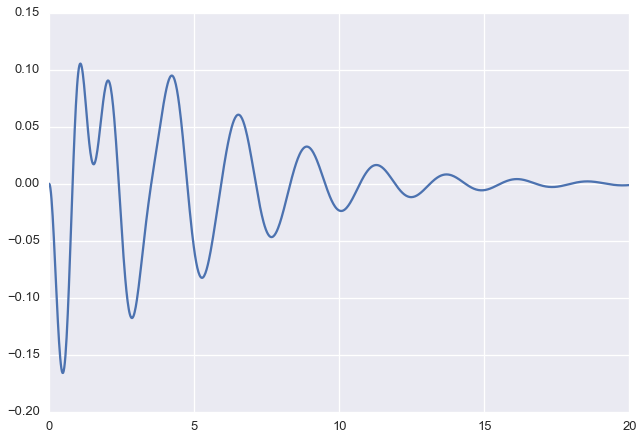

In [14]:
plt.plot(t,s)

In [15]:
# correct for any DC offset
offset = np.mean(s) 

# Get the natural frequency
sample_time = t[1] - t[0]
n = len(s)

fft_mag = fft((s - offset)*np.hanning(len(s)))
fft_freq = np.linspace(0.0, 1.0/(2.0*sample_time), n/2)

# Only return the "useful" part of the fft
fft_mag = 2.0/n * np.abs(fft_mag[0:n/2])
# freq, mag = CRAWLAB_fft(s,t,False)

window_len=11
window='hanning'

s_freq=np.r_[fft_freq[window_len-1:0:-1],fft_freq,fft_freq[-1:-window_len:-1]]
w=eval('np.'+window+'(window_len)')
y_freq=np.convolve(w/w.sum(),s_freq,mode='valid')

s_mag=np.r_[fft_mag[window_len-1:0:-1],fft_mag,fft_mag[-1:-window_len:-1]]
w=eval('np.'+window+'(window_len)')
y_mag=np.convolve(w/w.sum(),s_mag,mode='valid')


# maxes = argrelextrema(y_mag, np.greater)
maxes = argrelextrema(fft_mag, np.greater)
index = np.array(maxes)

In [16]:
# K = [1,2,2,4,5,5,6,10]
# K = np.array(K)
maxes_index = fft_mag[index].argsort()[0,-3:]
index[0,maxes_index]

array([26, 17,  8])

In [20]:
low, medium, high = fft_freq[index[0,maxes_index]]


1.3013026052104211

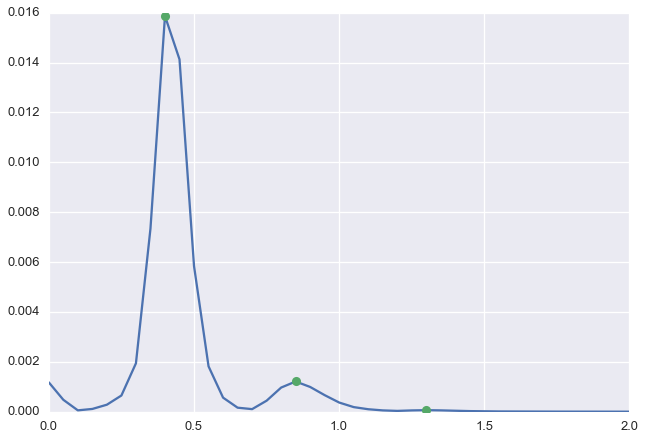

In [18]:
# plt.plot(y_freq, y_mag)
plt.plot(fft_freq,fft_mag)
plt.xlim(0,2)
plt.plot(fft_freq[index[0,maxes_index]], fft_mag[index[0,maxes_index]], "o", label="min")

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:33: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


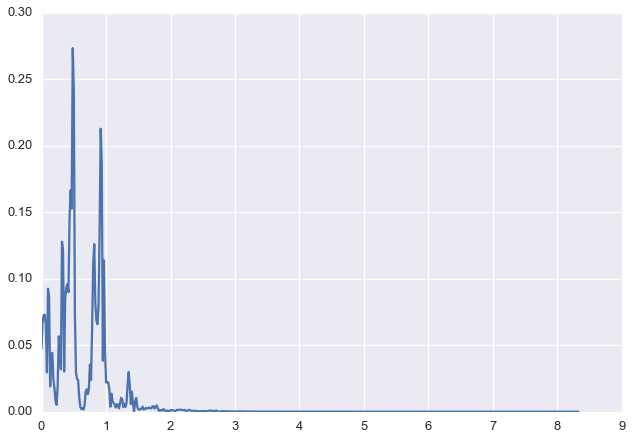

In [18]:
freq, mag = CRAWLAB_fft(s,t,False)
plt.plot(freq,mag)

In [17]:
def CRAWLAB_fft(data,time,plotflag):
    ''' Function to get the FFT for a response
    #
    # Inputs:
    #   time = time array corresponding to the data
    #   data = the response data array (only pass a single dimension/state at at time)
    #   plotflag = will plot the FFT if nonzero
    #   
    # Output:
    #   fft_freq = an array of the freqs used in the FFT
    #   fft_mag = an array of the amplitude of the FFT at each freq in fft_freq
    #
    # Created: 03/28/14
    #   - Joshua Vaughan
    #   - joshua.vaughan@louisiana.edu
    #   - http://www.ucs.louisiana.edu/~jev9637
    ######################################################################################
    '''
    
    from scipy.fftpack import fft
    
    # correct for any DC offset
    offset = np.mean(data) 

    # Get the natural frequency
    sample_time = time[1] - time[0]
    n = len(data)

    fft_mag = fft((data - offset)*np.hanning(len(data)))
    fft_freq = np.linspace(0.0, 1.0/(2.0*sample_time), n/2)
    
    # Only return the "useful" part of the fft
    fft_mag = 2.0/n * np.abs(fft_mag[0:n/2])
    
    if plotflag:
        # Plot the relationshiop
        #   Many of these setting could also be made default by the .matplotlibrc file
        fig = plt.figure(figsize=(6,4))
        ax = plt.gca()
        plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
        plt.setp(ax.get_ymajorticklabels(),fontsize=18)
        plt.setp(ax.get_xmajorticklabels(),fontsize=18)
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        ax.grid(True,linestyle=':',color='0.75')
        ax.set_axisbelow(True)

        plt.xlabel('Frequency (Hz)',fontsize=22,labelpad=8)
        plt.ylabel('FFT magnitude',fontsize=22,labelpad=10)
    
        plt.plot(fft_freq, fft_mag, linewidth=2, linestyle='-')
        
        # Adjust the page layout filling the page using the new tight_layout command
        plt.tight_layout(pad=0.5)
        plt.show()
    
    return fft_freq, fft_mag

In [ ]:
def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.

    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.

    input:
        x: the input signal
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal

    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)

    see also:

    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter

    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise ValueError

    if x.size < window_len:
        raise ValueError


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError


    s=np.r_[x[window_len-1:0:-1],x,x[-1:-window_len:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y